In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc

In [17]:
orders = pd.read_csv('/Users/xuetong/Downloads/instacart_2017_05_01/orders.csv')

In [3]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [18]:
orders_prior = pd.read_csv('/Users/xuetong/Downloads/instacart_2017_05_01/order_products__prior.csv')

In [5]:
print(f'shape of orders_prior dataframe {orders_prior.shape}')

shape of orders_prior dataframe (32434489, 4)


In [6]:
orders_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


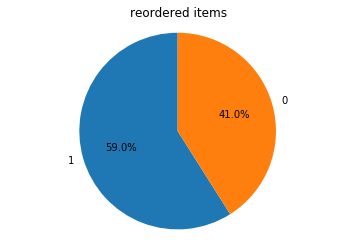

In [84]:
reorder_count = orders_prior['reordered'].value_counts()
plt.pie(reorder_count.values, labels=reorder_count.index,startangle=90, autopct='%.1f%%')
plt.axis('equal')
plt.title('reordered items')
plt.show()

In [7]:
product = pd.read_csv('/Users/xuetong/Downloads/instacart_2017_05_01/products.csv')

In [8]:
print(f'shape of product dataframe {product.shape}')

shape of product dataframe (49688, 4)


In [9]:
product.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [10]:
aisle = pd.read_csv('/Users/xuetong/Downloads/instacart_2017_05_01/aisles.csv')

In [11]:
print(f'shape of aisle dataframe {aisle.shape}')
aisle.head()

shape of aisle dataframe (134, 2)


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [12]:
department = pd.read_csv('/Users/xuetong/Downloads/instacart_2017_05_01/departments.csv')
print(f'shape of aisle dataframe {department.shape}')
department.head()

shape of aisle dataframe (21, 2)


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [20]:
df = orders_prior.merge(product,how = 'left', on = 'product_id')
df = df.merge(department, how = 'left',on = 'department_id')
df = df.merge(aisle, how = 'left', on = 'aisle_id')

In [21]:
df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,dairy eggs,eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,produce,fresh vegetables
2,2,9327,3,0,Garlic Powder,104,13,pantry,spices seasonings
3,2,45918,4,1,Coconut Butter,19,13,pantry,oils vinegars
4,2,30035,5,0,Natural Sweetener,17,13,pantry,baking ingredients


In [49]:
order_sequence.index

Int64Index([      2,       3,       4,       5,       6,       7,       8,
                  9,      10,      11,
            ...
            3421074, 3421075, 3421076, 3421077, 3421078, 3421079, 3421080,
            3421081, 3421082, 3421083],
           dtype='int64', name='order_id', length=3214874)

In [32]:
productCount = df.groupby(['product_id'],as_index = False)['product_name'].count()

In [33]:
productCount.columns = ['product_id','count']

In [87]:
product_count = df['product_name'].value_counts()[:20]

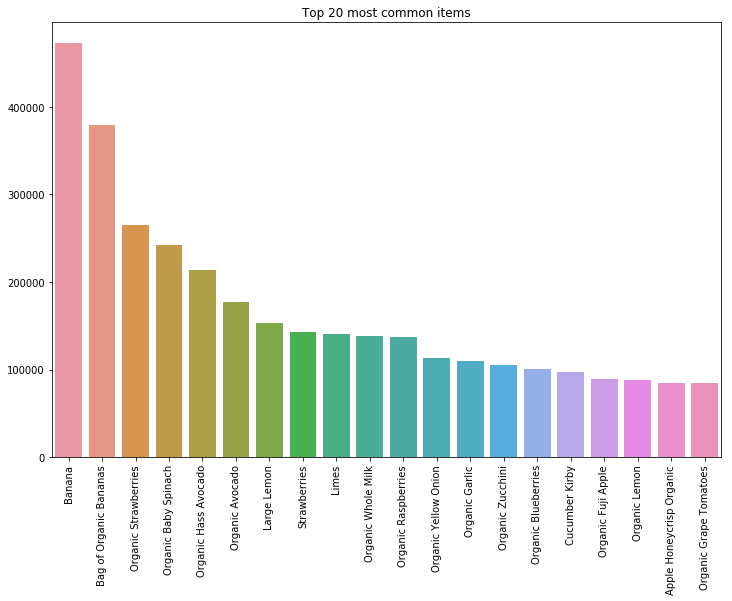

In [88]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x = product_count.index,y = product_count.values)
ax.set_xticklabels(labels =product_count.index, rotation=90)
ax.set_title('Top 20 most common items')
plt.show()

In [34]:
productCount.head(5)

,product_id,count
0,1,1852
1,2,90
2,3,277
3,4,329
4,5,15


/Users/xuetong/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[(0, 100000), Text(0.5,1,'Product Frequency Count')]

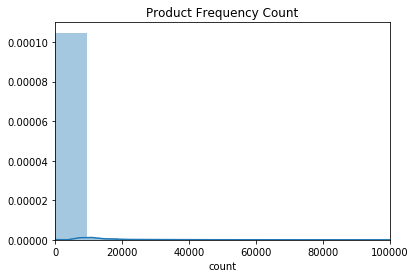

In [35]:
plt = sns.distplot(productCount['count'], kde=True)
plt.set(xlim = (0,100000),title ='Product Frequency Count')


In [22]:
first_item = df[df['add_to_cart_order'] == 1]

In [23]:
top_20_first_category = first_item['aisle'].value_counts()[:20]

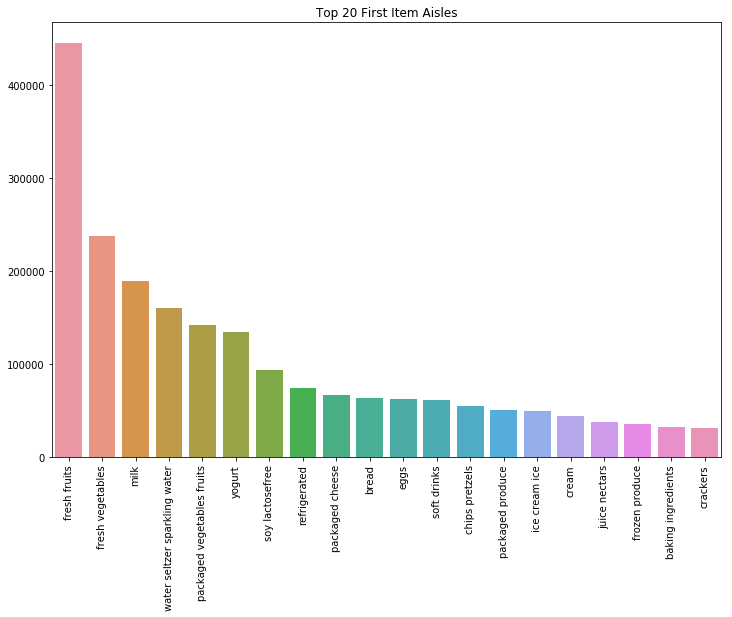

In [26]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x = top_20_first_category.index,y = top_20_first_category.values)
ax.set_xticklabels(labels =top_20_first_category.index, rotation=90)
ax.set_title('Top 20 First Item Aisles')
plt.show()

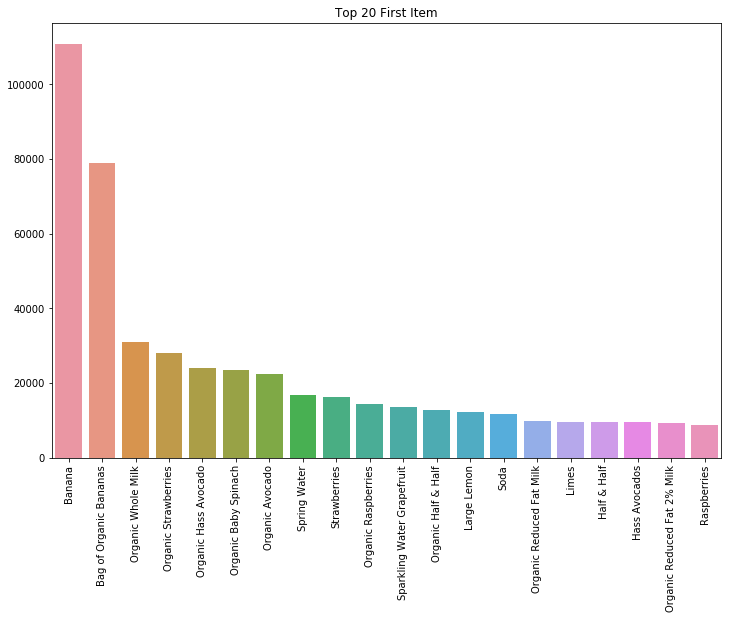

In [27]:
top_20_first_item = first_item['product_name'].value_counts()[:20]
plt.figure(figsize=(12,8))
ax = sns.barplot(x = top_20_first_item.index,y = top_20_first_item.values)
ax.set_xticklabels(labels =top_20_first_item.index, rotation=90)
ax.set_title('Top 20 First Item')
plt.show()

In [28]:
department_occurrency = pd.get_dummies(df['department'])

In [29]:
df = pd.concat([df,department_occurrency],axis = 1)

In [ ]:
department_df = df.drop(['product_id','add_to_cart_order','reordered','product_name','aisle_id','department_id','aisle_id'],axis = 1)

In [ ]:
department_df.head()

In [ ]:
grouped_department = department_df.groupby('order_id').sum()

In [ ]:
gourped_aisle.shape

In [ ]:
gourped_aisle.head()

In [ ]:
deparment_concurrence_corr = grouped_department.corr()

In [ ]:
deparment_concurrence_corr

In [ ]:
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(deparment_concurrence_corr,linewidths=.5,cmap=cmap,center=0)
ax.set_title('Department Concurrence Correlation')
plt.show()

In [ ]:
## longtail plot

In [30]:
df['order_id'].nunique()
### have over 3 million orders

3214874

In [36]:
productCount['count'].describe()

count     49677.000000
mean        652.907563
std        4792.114416
min           1.000000
25%          17.000000
50%          60.000000
75%         260.000000
max      472565.000000
Name: count, dtype: float64

In [67]:
order_item_count = df.groupby(['order_id'])['product_id'].count()


[Text(0.5,1,'distribution of number of item in each order')]

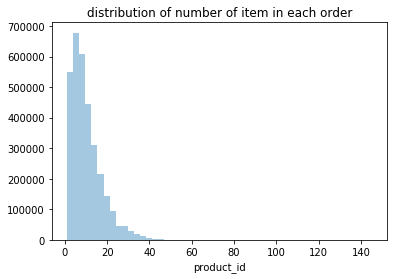

In [72]:
ax = sns.distplot(order_item_count,kde = False)
ax.set(title = 'distribution of number of item in each order')
